In [15]:
import pandas as pd

movies_df = pd.read_csv("top_200.csv")
movies_df.head()

,Title,Lifetime Gross,Year
0,Avatar,"$2,923,706,026",2009
1,Avengers: Endgame,"$2,799,439,100",2019
2,Avatar: The Way of Water,"$2,320,250,281",2022
3,Titanic,"$2,264,750,694",1997
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015


In [13]:
import requests
import json
api_key = "158ec92a"
from pprint import pprint
# Function to retrieve movie details from OMDb API
def get_movie_details(title):
    url = f"http://www.omdbapi.com/?t={title}&apikey={api_key}"  
    response = requests.get(url)
    data = response.json()
    return data

In [89]:
# List to store retrieved details
details_list = []

# Retrieve details for each movie
for title in movies_df['Title']:
    movie_details = get_movie_details(title)
    details_list.append(movie_details)

# Create DataFrame from details list
details_df = pd.DataFrame(details_list)

# Merge original dataset with retrieved details
final_df = pd.concat([movies_df, details_df], axis=1)

# Display final dataset
final_df.head()

,Title,Lifetime Gross,Year,Title,Year,Rated,Released,Runtime,Genre,Director,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,Avatar,"$2,923,706,026",2009,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,...,83,7.9,"1,384,939",tt0499549,movie,10 Feb 2016,"$785,221,649",N/A,N/A,True
1,Avengers: Endgame,"$2,799,439,100",2019,Avengers: Endgame,2019,PG-13,26 Apr 2019,181 min,"Action, Adventure, Drama","Anthony Russo, Joe Russo",...,78,8.4,"1,264,820",tt4154796,movie,30 Jul 2019,"$858,373,000",N/A,N/A,True
2,Avatar: The Way of Water,"$2,320,250,281",2022,Avatar: The Way of Water,2022,PG-13,16 Dec 2022,192 min,"Action, Adventure, Fantasy",James Cameron,...,67,7.6,"488,471",tt1630029,movie,28 Mar 2023,"$684,075,767",N/A,N/A,True
3,Titanic,"$2,264,750,694",1997,Titanic,1997,PG-13,19 Dec 1997,194 min,"Drama, Romance",James Cameron,...,75,7.9,"1,280,439",tt0120338,movie,01 Jun 2014,"$674,292,608",N/A,N/A,True
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015,Star Wars: Episode VII - The Force Awakens,2015,PG-13,18 Dec 2015,138 min,"Action, Adventure, Sci-Fi",J.J. Abrams,...,80,7.8,"973,458",tt2488496,movie,01 Apr 2016,"$936,662,225",N/A,N/A,True


In [90]:
print(final_df.columns)

Index(['Title', 'Lifetime Gross', 'Year', 'Title', 'Year', 'Rated', 'Released',
       'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
       'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating',
       'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production',
       'Website', 'Response'],
      dtype='object')


In [91]:
filtered = final_df.drop(columns=['Production', 'Website', 'Response', 'Poster', 'imdbID', 'Type'])

filtered.head()

,Title,Lifetime Gross,Year,Title,Year,Rated,Released,Runtime,Genre,Director,...,Plot,Language,Country,Awards,Ratings,Metascore,imdbRating,imdbVotes,DVD,BoxOffice
0,Avatar,"$2,923,706,026",2009,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,...,A paraplegic Marine dispatched to the moon Pan...,"English, Spanish",United States,Won 3 Oscars. 91 wins & 131 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",83,7.9,"1,384,939",10 Feb 2016,"$785,221,649"
1,Avengers: Endgame,"$2,799,439,100",2019,Avengers: Endgame,2019,PG-13,26 Apr 2019,181 min,"Action, Adventure, Drama","Anthony Russo, Joe Russo",...,After the devastating events of Avengers: Infi...,"English, Japanese, Xhosa, German",United States,Nominated for 1 Oscar. 70 wins & 133 nominatio...,"[{'Source': 'Internet Movie Database', 'Value'...",78,8.4,"1,264,820",30 Jul 2019,"$858,373,000"
2,Avatar: The Way of Water,"$2,320,250,281",2022,Avatar: The Way of Water,2022,PG-13,16 Dec 2022,192 min,"Action, Adventure, Fantasy",James Cameron,...,Jake Sully lives with his newfound family form...,English,United States,Won 1 Oscar. 75 wins & 150 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",67,7.6,"488,471",28 Mar 2023,"$684,075,767"
3,Titanic,"$2,264,750,694",1997,Titanic,1997,PG-13,19 Dec 1997,194 min,"Drama, Romance",James Cameron,...,A seventeen-year-old aristocrat falls in love ...,"English, Swedish, Italian, French","United States, Mexico",Won 11 Oscars. 126 wins & 83 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",75,7.9,"1,280,439",01 Jun 2014,"$674,292,608"
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015,Star Wars: Episode VII - The Force Awakens,2015,PG-13,18 Dec 2015,138 min,"Action, Adventure, Sci-Fi",J.J. Abrams,...,"As a new threat to the galaxy rises, Rey, a de...",English,United States,Nominated for 5 Oscars. 64 wins & 140 nominati...,"[{'Source': 'Internet Movie Database', 'Value'...",80,7.8,"973,458",01 Apr 2016,"$936,662,225"


In [92]:
print(filtered.columns)

Index(['Title', 'Lifetime Gross', 'Year', 'Title', 'Year', 'Rated', 'Released',
       'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language',
       'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes',
       'DVD', 'BoxOffice'],
      dtype='object')


## Top 10 Director's movie ratings (meta critic, ibmd score, rotten tomatoes) 
## Average run time vs rating 
- filterd by genre


In [118]:
print(filtered['Runtime'].nunique())

85


In [93]:
print(filtered['Director'].nunique())

127


In [94]:
# create a table with only the name of the director and the gross earnings
filtered['Lifetime Gross'] = filtered['Lifetime Gross'].str.replace('$', '').str.replace(',', '').astype(int)


/private/tmp/PKInstallSandbox.VTjnys/tmp/ipykernel_27603/1405178441.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtered['Lifetime Gross'] = filtered['Lifetime Gross'].str.replace('$', '').str.replace(',', '').astype(int)


In [95]:

director_gross_earnings = filtered.groupby('Director')['Lifetime Gross'].sum().reset_index()

sorted_dge = director_gross_earnings.sort_values(by='Lifetime Gross', ascending=False)
sorted_dge.head(10)

,Director,Lifetime Gross
54,James Cameron,7508707001
10,"Anthony Russo, Joe Russo",6721322058
95,Peter Jackson,5928027449
34,David Yates,5727642948
27,Christopher Nolan,4637621544
120,Steven Spielberg,4524389849
85,Michael Bay,4379286781
63,Jon Watts,3933942258
113,Sam Raimi,3466250724
47,George Lucas,3324653253


In [99]:
# Taking the first 10 rows
first_10_directors = sorted_dge.head(10)

# Displaying the new DataFrame
print(len(first_10_directors))

10


<Axes: xlabel='Director'>

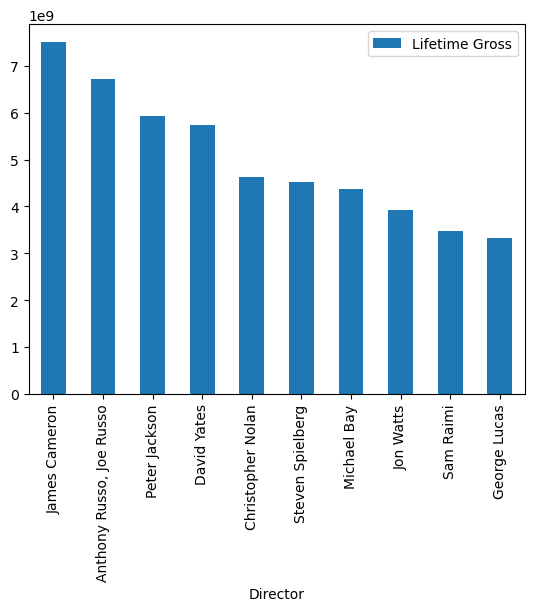

In [104]:
first_10_directors.plot( "Director", "Lifetime Gross", kind = 'bar')

In [105]:
# Extracting the list of directors from first_10_directors
top_directors = first_10_directors['Director'].tolist()

# Filtering the main DataFrame to keep only rows where the director is in the top_directors list
filtered_top_directors = filtered[filtered['Director'].isin(top_directors)]

# Displaying the filtered DataFrame
print(len(filtered_top_directors))
filtered_top_directors.head()



46


,Title,Lifetime Gross,Year,Title,Year,Rated,Released,Runtime,Genre,Director,...,Plot,Language,Country,Awards,Ratings,Metascore,imdbRating,imdbVotes,DVD,BoxOffice
0,Avatar,2923706026,2009,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,...,A paraplegic Marine dispatched to the moon Pan...,"English, Spanish",United States,Won 3 Oscars. 91 wins & 131 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",83,7.9,"1,384,939",10 Feb 2016,"$785,221,649"
1,Avengers: Endgame,2799439100,2019,Avengers: Endgame,2019,PG-13,26 Apr 2019,181 min,"Action, Adventure, Drama","Anthony Russo, Joe Russo",...,After the devastating events of Avengers: Infi...,"English, Japanese, Xhosa, German",United States,Nominated for 1 Oscar. 70 wins & 133 nominatio...,"[{'Source': 'Internet Movie Database', 'Value'...",78,8.4,"1,264,820",30 Jul 2019,"$858,373,000"
2,Avatar: The Way of Water,2320250281,2022,Avatar: The Way of Water,2022,PG-13,16 Dec 2022,192 min,"Action, Adventure, Fantasy",James Cameron,...,Jake Sully lives with his newfound family form...,English,United States,Won 1 Oscar. 75 wins & 150 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",67,7.6,"488,471",28 Mar 2023,"$684,075,767"
3,Titanic,2264750694,1997,Titanic,1997,PG-13,19 Dec 1997,194 min,"Drama, Romance",James Cameron,...,A seventeen-year-old aristocrat falls in love ...,"English, Swedish, Italian, French","United States, Mexico",Won 11 Oscars. 126 wins & 83 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",75,7.9,"1,280,439",01 Jun 2014,"$674,292,608"
5,Avengers: Infinity War,2052415039,2018,Avengers: Infinity War,2018,PG-13,27 Apr 2018,149 min,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo",...,The Avengers and their allies must be willing ...,English,"United States, Norway",Nominated for 1 Oscar. 46 wins & 80 nomination...,"[{'Source': 'Internet Movie Database', 'Value'...",68,8.4,"1,203,157",31 Jul 2018,"$678,815,482"


In [115]:
# Calculate average Metascore and imdbRating for each director
average_scores = filtered_top_directors.groupby('Director')[['Metascore', 'imdbRating']].mean().reset_index()

# Create a list of dictionaries from the DataFrame
director_scores_dicts = average_scores.to_dict(orient='records')

# Displaying the list of dictionaries
print(len(average_scores))
average_scores

10


/private/tmp/PKInstallSandbox.VTjnys/tmp/ipykernel_27603/592528957.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = filtered_top_directors.groupby('Director')[['Metascore', 'imdbRating']].mean().reset_index()


,Director,Metascore
0,"Anthony Russo, Joe Russo",1.967189e+07
1,Christopher Nolan,1.576977e+09
2,David Yates,1.428610e+11
3,George Lucas,1.292226e+07
4,James Cameron,2.789250e+05
5,Jon Watts,2.389910e+05
6,Michael Bay,8.464712e+08
7,Peter Jackson,1.576433e+11
8,Sam Raimi,1.514935e+07
9,Steven Spielberg,1.148776e+11


In [42]:
# Extract director information
directors_ratings = {}
for index, row in final_df.iterrows():
    director = row['Director']
    rating = float(row['imdbRating'])
    if director not in directors_ratings:
        directors_ratings[director] = [rating]
    else:
        directors_ratings[director].append(rating)

# Calculate average rating for each director
average_ratings = {}
for director, ratings in directors_ratings.items():
    average_ratings[director] = sum(ratings) / len(ratings)

# Create DataFrame for average ratings
avaerage_imdb_ratings = pd.DataFrame(list(average_ratings.items()), columns=['Director', 'Average Rating'])
avaerage_imdb_ratings_sorted = avaerage_imdb_ratings.sort_values(by='Average Rating', ascending=False)

# Display the table
avaerage_imdb_ratings_sorted.head(10)

,Director,Average Rating
97,Robert Zemeckis,8.800000
91,Denis Villeneuve,8.800000
26,Christopher Nolan,8.640000
94,"Joaquim Dos Santos, Kemp Powers, Justin K. Tho...",8.600000
5,"Roger Allers, Rob Minkoff",8.500000
64,"Lee Unkrich, Adrian Molina",8.400000
29,Lee Unkrich,8.300000
83,"Pete Docter, Bob Peterson",8.300000
21,Peter Jackson,8.283333
44,"Andrew Stanton, Lee Unkrich",8.200000


In [117]:
first_10_directors.to_csv("top_10_directors.csv", index=False)


In [119]:
filtered.to_csv("complete_top_200_movies.csv", index = False)